<a href="https://colab.research.google.com/github/baharsevinti/Machine-Learning-Diabet/blob/main/3_MLP_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



MLP Sınıflandırıcı Metrikleri:
f1-score: 0.6410256410256411
Accuracy: 0.7575757575757576
Specificity: 0.8278145695364238
Sensitivity: 0.625

SVM Sınıflandırıcı Metrikleri:
f1-score: 0.6225165562913908
Accuracy: 0.7532467532467533
Specificity: 0.8410596026490066
Sensitivity: 0.5875


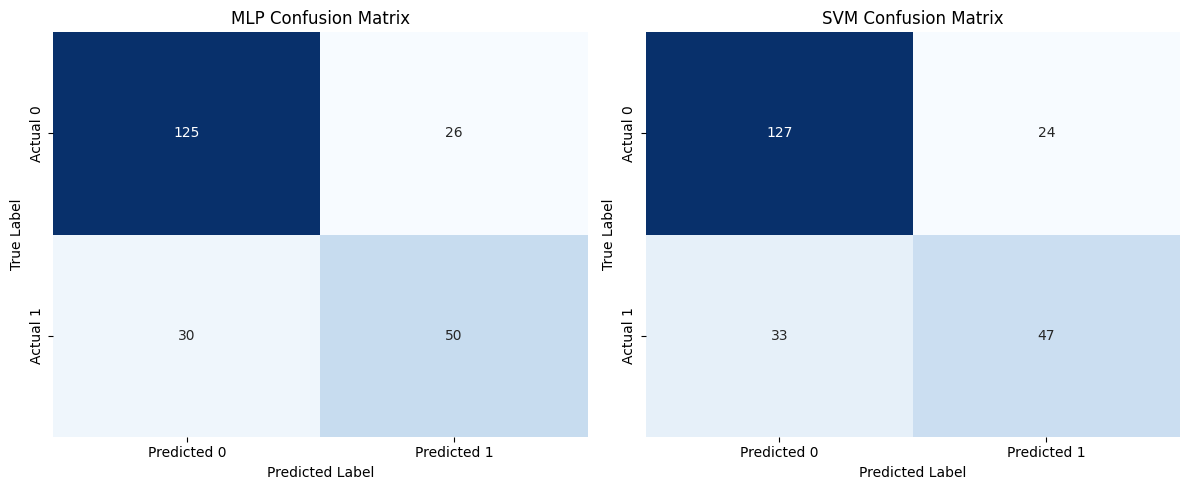

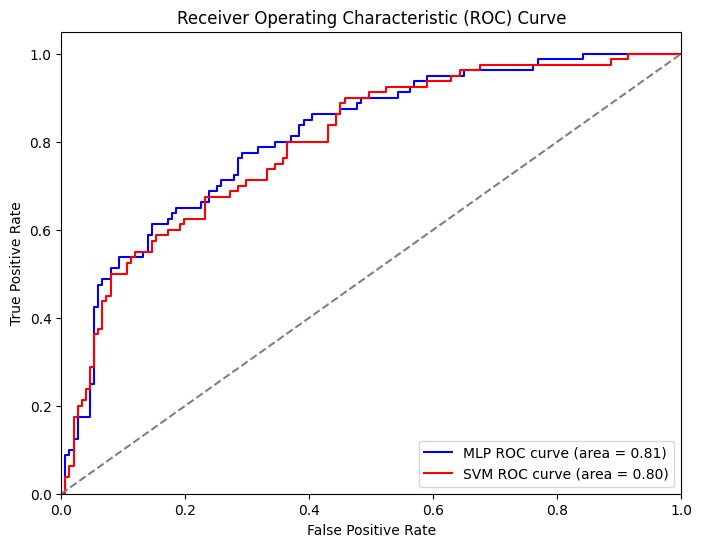

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Veri Setini Projete dahil etme
data = pd.read_csv("dataset.csv")

# Özellikler ve hedef değişkeni ayırma
X = data.drop(columns=['Class variable (0 or 1)'])  # Bağımsız değişkenler
y = data['Class variable (0 or 1)']  # Hedef değişken

# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Min-Max normalizasyonu için scaler oluşturma ve uygulama
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# MLP sınıflandırıcısı ile eğitim
mlp_classifier = MLPClassifier(random_state=42)
mlp_classifier.fit(X_train_normalized, y_train)

# MLP sınıflandırıcısı ile tahmin
mlp_predictions = mlp_classifier.predict(X_test_normalized)

# Confusion matrix ve sınıflandırma raporu
mlp_conf_matrix = confusion_matrix(y_test, mlp_predictions)
mlp_classification_report = classification_report(y_test, mlp_predictions)

# SVM sınıflandırıcısı ile eğitim
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_normalized, y_train)

# SVM sınıflandırıcısı ile tahmin
svm_predictions = svm_classifier.predict(X_test_normalized)

# Confusion matrix ve sınıflandırma raporu
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)

# MLP Sınıflandırıcısı için f1-score ve accuracy
mlp_f1_score = f1_score(y_test, mlp_predictions)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
tn_mlp, fp_mlp, fn_mlp, tp_mlp = mlp_conf_matrix.ravel()
mlp_specificity = tn_mlp / (tn_mlp + fp_mlp)
mlp_sensitivity = tp_mlp / (tp_mlp + fn_mlp)

print("\nMLP Sınıflandırıcı Metrikleri:")
print(f"f1-score: {mlp_f1_score}")
print(f"Accuracy: {mlp_accuracy}")
print(f"Specificity: {mlp_specificity}")
print(f"Sensitivity: {mlp_sensitivity}")

# SVM Sınıflandırıcısı için f1-score ve accuracy
svm_f1_score = f1_score(y_test, svm_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
tn_svm, fp_svm, fn_svm, tp_svm = svm_conf_matrix.ravel()
svm_specificity = tn_svm / (tn_svm + fp_svm)
svm_sensitivity = tp_svm / (tp_svm + fn_svm)

print("\nSVM Sınıflandırıcı Metrikleri:")
print(f"f1-score: {svm_f1_score}")
print(f"Accuracy: {svm_accuracy}")
print(f"Specificity: {svm_specificity}")
print(f"Sensitivity: {svm_sensitivity}")

# Confusion matrix'in görselleştirilmesi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(mlp_conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(svm_conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()


from sklearn.metrics import roc_curve, roc_auc_score

# MLP ve SVM için ROC eğrisi oluşturma
mlp_probs = mlp_classifier.predict_proba(X_test_normalized)[:, 1]
svm_probs = svm_classifier.decision_function(X_test_normalized)

mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(mlp_fpr, mlp_tpr, color='blue', label='MLP ROC curve (area = %0.2f)' % roc_auc_score(y_test, mlp_probs))
plt.plot(svm_fpr, svm_tpr, color='red', label='SVM ROC curve (area = %0.2f)' % roc_auc_score(y_test, svm_probs))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
